# Lets Grow More Internship January-2023

Author : Subhradeep Ganguly

Stock Market Prediction and Forecasting Using Stacked LSTM

Using Keras and Tensorflow

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [4]:
df = pd.read_csv('Reliance.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


In [6]:
df_close = df['Close']

In [7]:
df_close.shape

(1232,)

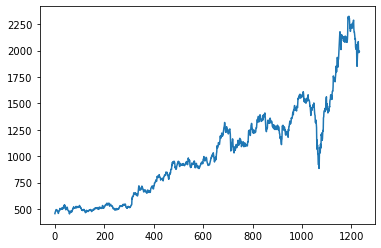

In [8]:
plt.plot(df_close)

In [9]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [10]:
df_close.shape

(1232, 1)

In [11]:
df_close

array([[0.00145623],
       [0.00753497],
       [0.01076806],
       ...,
       [0.81587418],
       [0.82463827],
       [0.82295492]])

In [12]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [13]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [15]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 12s 318ms/step - loss: 0.0256 - val_loss: 0.0488
Epoch 2/100
13/13 [==============================] - 3s 241ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 3/100
13/13 [==============================] - 3s 246ms/step - loss: 0.0013 - val_loss: 0.0078
Epoch 4/100
13/13 [==============================] - 3s 239ms/step - loss: 8.2971e-04 - val_loss: 0.0057
Epoch 5/100
13/13 [==============================] - 3s 254ms/step - loss: 5.2718e-04 - val_loss: 0.0054
Epoch 6/100
13/13 [==============================] - 3s 247ms/step - loss: 4.7459e-04 - val_loss: 0.0061
Epoch 7/100
13/13 [==============================] - 3s 245ms/step - loss: 4.7115e-04 - val_loss: 0.0062
Epoch 8/100
13/13 [==============================] - 3s 243ms/step - loss: 4.5814e-04 - val_loss: 0.0063
Epoch 9/100
13/13 [==============================] - 3s 242ms/step - loss: 4.6629e-04 - val_loss: 0.0073
Epoch 10/100
13/13 [==============================] - 3s 249ms/ste

13/13 [==============================] - 3s 236ms/step - loss: 2.6239e-04 - val_loss: 0.0036
Epoch 79/100
13/13 [==============================] - 3s 236ms/step - loss: 2.6306e-04 - val_loss: 0.0039
Epoch 80/100
13/13 [==============================] - ETA: 0s - loss: 2.6659e-0 - 3s 236ms/step - loss: 2.6659e-04 - val_loss: 0.0050
Epoch 81/100
13/13 [==============================] - 3s 237ms/step - loss: 2.5362e-04 - val_loss: 0.0025
Epoch 82/100
13/13 [==============================] - 3s 236ms/step - loss: 2.6738e-04 - val_loss: 0.0039
Epoch 83/100
13/13 [==============================] - 3s 237ms/step - loss: 2.4540e-04 - val_loss: 0.0054
Epoch 84/100
13/13 [==============================] - 3s 235ms/step - loss: 2.7055e-04 - val_loss: 0.0029
Epoch 85/100
13/13 [==============================] - 3s 238ms/step - loss: 2.5953e-04 - val_loss: 0.0050
Epoch 86/100
13/13 [==============================] - 3s 237ms/step - loss: 2.4910e-04 - val_loss: 0.0029
Epoch 87/100
13/13 [===========

In [19]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [20]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [21]:
math.sqrt(mean_squared_error(y_train, train_predict))

926.8646890390611

In [22]:
math.sqrt(mean_squared_error(y_test, test_predict))

1693.495926656535

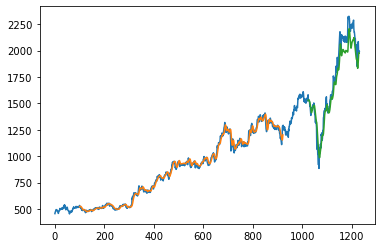

In [23]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data), x_test.shape

(308, (207, 100, 1))

In [25]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 101)

In [26]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [27]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.67861484 0.66843459 0.68633683 0.69849431 0.71321692 0.74736477
 0.73221462 0.7186143  0.73264216 0.76139264 0.79182641 0.7822073
 0.74319647 0.74287584 0.77937498 0.78375706 0.81135857 0.82869966
 0.85745014 0.90466386 0.91003455 0.92152404 0.8782113  0.88473103
 0.86242004 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242
 0.89060937 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912
 0.88991463 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596
 0.89993454 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149
 0.88646781 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211
 0.99743488 0.98824331 0.99695397 1.         0.98621258 0.9899266
 0.96328709 0.93939953 0.94990047 0.92339443 0.93434952 0.942125
 0.9575156  0.9517976  0.94693455 0.93996067 0.93897212 0.96416879
 0.95441608 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465
 0.92050875 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546
 0.84211296 0.84499871 0.83268088 0.84093732 0.85568661

8 day output [[0.6687919]]
9 day input [0.76139264 0.79182641 0.7822073  0.74319647 0.74287584 0.77937498
 0.78375706 0.81135857 0.82869966 0.85745014 0.90466386 0.91003455
 0.92152404 0.8782113  0.88473103 0.86242004 0.83137164 0.90704202
 0.8941363  0.8982245  0.9048242  0.89060937 0.89806416 0.89475093
 0.89178502 0.88737626 0.87537912 0.88991463 0.89686177 0.87842514
 0.87030236 0.8777304  0.87043596 0.89993454 0.88566622 0.88863201
 0.86968773 0.87318804 0.89507149 0.88646781 0.86784409 0.87072978
 0.88379584 0.91278677 0.99436211 0.99743488 0.98824331 0.99695397
 1.         0.98621258 0.9899266  0.96328709 0.93939953 0.94990047
 0.92339443 0.93434952 0.942125   0.9575156  0.9517976  0.94693455
 0.93996067 0.93897212 0.96416879 0.95441608 0.95131656 0.95324044
 0.97656673 0.98020064 0.93691465 0.92050875 0.92072245 0.90987421
 0.89314775 0.8837156  0.88697546 0.84211296 0.84499871 0.83268088
 0.84093732 0.85568661 0.76107195 0.74661661 0.78017657 0.80251431
 0.84213971 0.85365588 

 0.63146806 0.62807202 0.62554598 0.62367487]
17 day output [[0.62225723]]
18 day input [0.85745014 0.90466386 0.91003455 0.92152404 0.8782113  0.88473103
 0.86242004 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242
 0.89060937 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912
 0.88991463 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596
 0.89993454 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149
 0.88646781 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211
 0.99743488 0.98824331 0.99695397 1.         0.98621258 0.9899266
 0.96328709 0.93939953 0.94990047 0.92339443 0.93434952 0.942125
 0.9575156  0.9517976  0.94693455 0.93996067 0.93897212 0.96416879
 0.95441608 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465
 0.92050875 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546
 0.84211296 0.84499871 0.83268088 0.84093732 0.85568661 0.76107195
 0.74661661 0.78017657 0.80251431 0.84213971 0.85365588 0.8717452
 0.82506575 0.81587418 0.82463827 0.82295492 0

25 day output [[0.61098504]]
26 day input [0.90704202 0.8941363  0.8982245  0.9048242  0.89060937 0.89806416
 0.89475093 0.89178502 0.88737626 0.87537912 0.88991463 0.89686177
 0.87842514 0.87030236 0.8777304  0.87043596 0.89993454 0.88566622
 0.88863201 0.86968773 0.87318804 0.89507149 0.88646781 0.86784409
 0.87072978 0.88379584 0.91278677 0.99436211 0.99743488 0.98824331
 0.99695397 1.         0.98621258 0.9899266  0.96328709 0.93939953
 0.94990047 0.92339443 0.93434952 0.942125   0.9575156  0.9517976
 0.94693455 0.93996067 0.93897212 0.96416879 0.95441608 0.95131656
 0.95324044 0.97656673 0.98020064 0.93691465 0.92050875 0.92072245
 0.90987421 0.89314775 0.8837156  0.88697546 0.84211296 0.84499871
 0.83268088 0.84093732 0.85568661 0.76107195 0.74661661 0.78017657
 0.80251431 0.84213971 0.85365588 0.8717452  0.82506575 0.81587418
 0.82463827 0.82295492 0.79579294 0.78152859 0.76467013 0.74670422
 0.72876751 0.7116046  0.69569862 0.68136752 0.66879189 0.65803349
 0.64905715 0.6417529

In [28]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [29]:
df3 = df_close.tolist()
df3.extend(lst_output)
len(df_close)

1232